# Project Title: 

### Predicting Agricultural Nitrous Oxide Emissions Using Machine Learning

### Introduction:
 
This project aims to predict nitrous oxide (N2O) emissions from agricultural activities using machine learning. Nitrous oxide is a potent greenhouse gas, and accurate predictions can help in better managing and mitigating its emissions.

### Data Preprocessing:

- Data Loading: The dataset is loaded from an Excel file.

- Missing Values: Any missing values in the dataset are handled by dropping rows with missing values.

- Encoding Categorical Variables: If there are categorical variables, they are encoded using one-hot encoding.

- Feature Scaling: The features are standardized to ensure they are on the same scale.

### Model Training:

A Random Forest Regressor is used for training the model. This ensemble method is chosen for its robustness and ability to handle both linear and non-linear relationships.

### Model Evaluation

The model's performance is evaluated using Mean Squared Error (MSE), which measures the average squared difference between the predicted and actual values.

### Visualization:

A scatter plot is created to visualize the relationship between the actual and predicted N2O emissions, with a red line representing the ideal predictions.

### Conclusion:

The project demonstrates the use of machine learning to predict agricultural nitrous oxide emissions to improve agricultural practices and monitor crop health.

In [145]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import os
import seaborn as sns
from joblib import dump, load

In [129]:
# Load the data
file_path = r'C:\Users\Aya\Downloads\Folder\NO2_Set_Agri.xlsx'
data = pd.read_excel(file_path)

In [130]:
#View the data
data.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012-02-09,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012-02-10,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012-02-18,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012-02-19,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,...,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012-03-16,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,...,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [131]:
#view data types
print(data.isnull().sum())

Date            0
Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64


In [132]:
# Drop missing values
data = data.dropna()

In [133]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

In [134]:
# Feature and target variables
X = data.drop(columns=['N2O']) 
y = data['N2O']

In [135]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Convert 'Date' column in training and test data to integers
X_train['Date'] = (X_train['Date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1D')
X_test['Date'] = (X_test['Date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1D')

In [137]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [139]:
# Predict and evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 338.38004461275005
R-squared: 0.33337970519468185


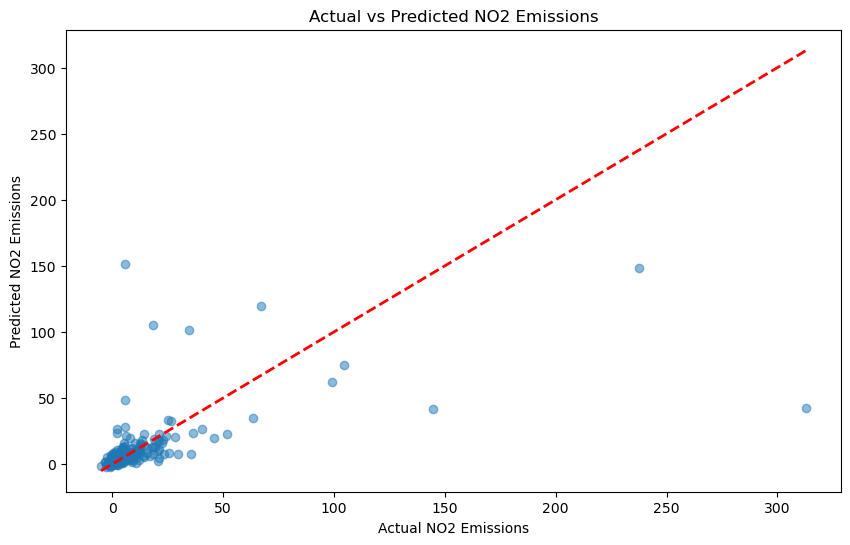

In [143]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual NO2 Emissions')
plt.ylabel('Predicted NO2 Emissions')
plt.title('Actual vs Predicted NO2 Emissions')
plt.show()

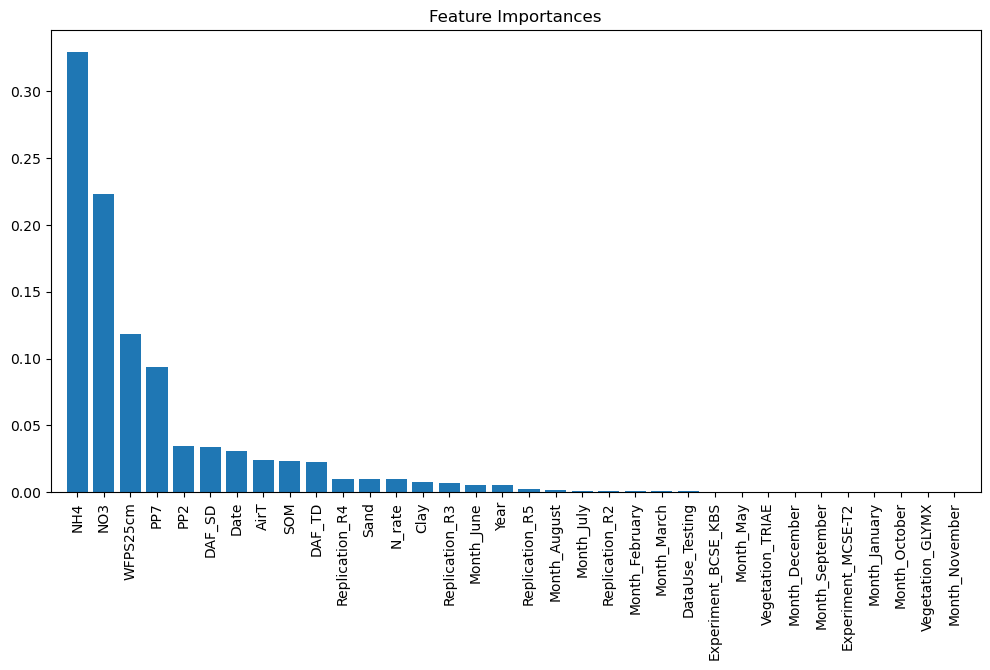

In [144]:
# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

In [146]:
#save model
dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']